<a href="https://colab.research.google.com/github/Pratham-Sri/Deep-Learning/blob/main/NN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow
There are many definitions for a regression problem but in our case, we're going to simplify it : predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit it

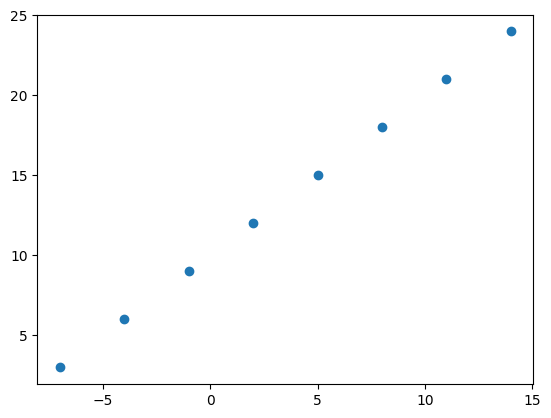

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualize it
plt.scatter(X,y);

### Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with Tensorflow
1.**Creating a model** - define the input and output layers, as well hidden layers of a deep learning model.

2.**Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our models how to improve its patterns and learnings) and evaluation metrics (what we can use to interpret the performance of our model).

3.**Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)
X = tf.reshape(X, shape = (-1,1))

# Create a mdoel using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 399ms/step - loss: 10.9520 - mae: 10.9520
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 10.8195 - mae: 10.8195
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 10.6870 - mae: 10.6870
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 10.5545 - mae: 10.5545
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.4220 - mae: 10.4220


In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[15.401129]], dtype=float32)

### Improving our model
1.**Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2.**Compiling the model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3.**Fitting the model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the models more examples to learn from).

In [ ]:
# Rebuilding the model
tf.random.set_seed(42)
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 404ms/step - loss: 17.3343 - mae: 17.3343
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 17.0531 - mae: 17.0531
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 16.7718 - mae: 16.7718
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 16.4906 - mae: 16.4906
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 16.2093 - mae: 16.2093
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 15.9280 - mae: 15.9280
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 15.6468 - mae: 15.6468
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 15.3656 - mae: 15.3656
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 15.0843 - mae: 15.0843
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 14.8349 - mae: 14.8349
Epoch 11/100
1/1 [==============================

In [ ]:
X,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 74ms/step


array([[29.788094]], dtype=float32)

In [ ]:
# Rebuilding the model
tf.random.set_seed(42)
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

# Fit the model
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 645ms/step - loss: 14.3733 - mae: 14.3733
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 14.2795 - mae: 14.2795
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 14.1859 - mae: 14.1859
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 14.0927 - mae: 14.0927
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 13.9998 - mae: 13.9998
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 13.9069 - mae: 13.9069
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.8143 - mae: 13.8143
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 13.7217 - mae: 13.7217
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 13.6294 - mae: 13.6294
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 13.5372 - mae: 13.5372
Epoch 11/100
1/1 [==============================

In [ ]:
X,y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 240ms/step


array([[20.167635]], dtype=float32)

## Common ways to improve a deep model:
1. Adding layers
2. Increase the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Changing the learning rate (Maybe the most important hyperparameter for a neural network)
6. Fitting more data
7. Fitting more longer

## Evaluating model

Typical workflow while building neural networks is:

Build a model -> fit it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it.....

While evaluating we should visualize the data:
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does our model perform while it learns?
* The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for our dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

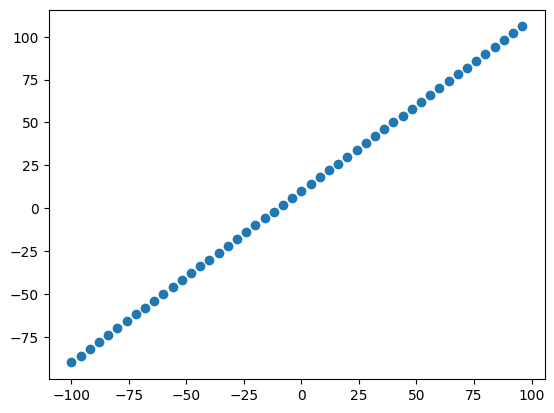

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

# The 3 sets

* **The training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the data available
len(X)

50

In [ ]:
# Split the data into training and test sets
X_train = X[:40] # first 40 examples (80% of the data)
y_train = y[:40]

X_test = X[40:50] # last 10 examples (20% of the data)
y_test = y[40:50]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

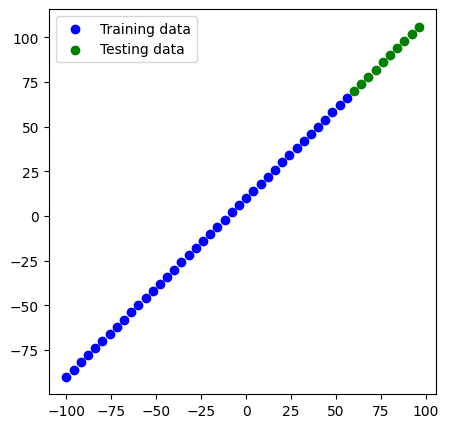

In [ ]:
plt.figure(figsize = (5,5))
plt.scatter(X_train, y_train, c = "b", label = "Training data")
plt.scatter(X_test, y_test, c = "g", label = "Testing data")
plt.legend()

In [ ]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model
#model.fit(X_train, y_train, epochs = 100)

In [ ]:
# Let's build a model which builds automatically by defining the input shape argument the first layer
np.random.seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1]),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1,name = "output_layer")
],name = "OLay")

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [ ]:
model.summary()

Model: "OLay"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters from other models during **transfer training**).

In [ ]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
model.summary()

Model: "OLay"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
 dense_17 (Dense)            (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


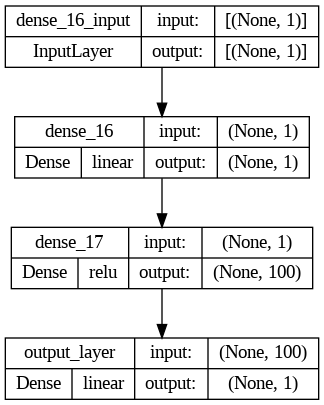

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True,show_layer_activations = True)

### Visualizing our model's predictions

To visualize predictions, it's goof idea to plot them against the ground truth labels

Often you'll see this in the form of `y_test` or `y_true` versus `y_preds`(ground truth versus your model's predictions).

In [ ]:
y_pred = model.predict(X_test)
y_pred

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_13' (type Sequential).
    
    Input 0 of layer "dense_19" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_13' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=False
      • mask=None


In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize = (10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  #  Plot testing data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # Show the legend
  plt.legend()

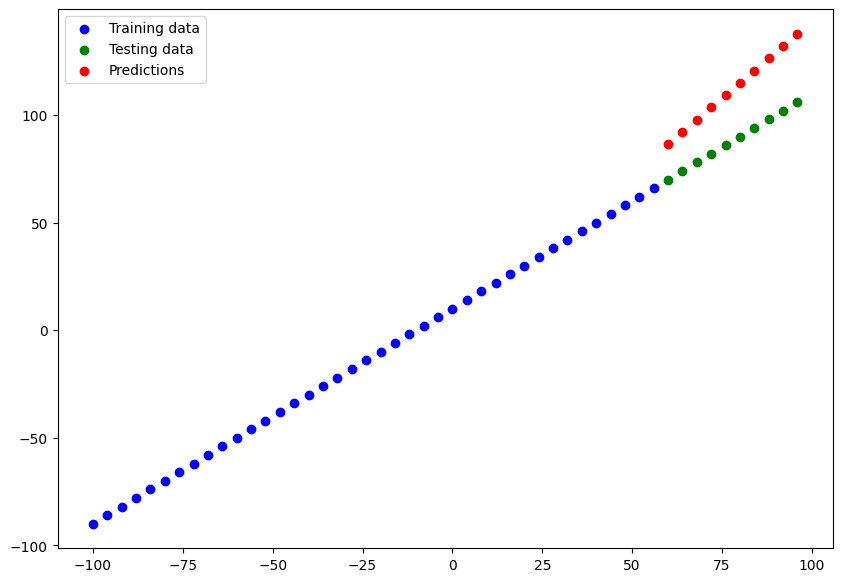

In [ ]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 144ms/step - loss: 24.1751 - mae: 24.1751


[24.175098419189453, 24.175098419189453]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.      , 10.449007, 12.375735, 16.106915, 21.327942, 27.022253,
       32.716568, 38.410866, 44.105164, 49.7995  ], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 86.55072 ],
       [ 92.24503 ],
       [ 97.93934 ],
       [103.633644],
       [109.32794 ],
       [115.022255],
       [120.71657 ],
       [126.410866],
       [132.10516 ],
       [137.7995  ]], dtype=float32)>

In [ ]:
mae  = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=24.175104>

In [ ]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=608.11865>

In [ ]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true,tf.squeeze(y_pred))

In [ ]:
X_train = X_train[-1:1]
len(X_train)

0

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_14' (type Sequential).
    
    Input 0 of layer "dense_20" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_14' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None
